In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

STEP 2. GET THE DATA

In [0]:
import os # in order to run file I/O operation 
#import tarfile # to support compressed (tar) files
from six.moves import urllib # support URL download

HOUSING_URL = "https://raw.githubusercontent.com/alexagomez/codeathon1/master/housing.csv"
#HOUSING_PATH = os.path.join("datasets", "housing")
#HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    #"""Fetch housing data from a remote URL to Colab file system"""
    #if not os.path.isdir(housing_path):
    #    os.makedirs(housing_path)
    #tgz_path = os.path.join(housing_path, "housing.tgz")
    #urllib.request.urlretrieve(housing_url, tgz_path)
    #housing_tgz = tarfile.open(tgz_path)
    #housing_tgz.extractall(path=housing_path)
    #housing_tgz.close()

Some of these are commented out because I don't have a tar file


In [0]:
#fetch_housing_data()

In [0]:
import pandas as pd # Pandas library enables data manipulation

COLUMN_NAMES = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

def load_housing_data(housing_url=HOUSING_URL, column_names = COLUMN_NAMES):
    """Load Housing Data into Workspace from a CSV"""
    #csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(housing_url, sep=r'\s*\s*', engine ='python', header = None, names = column_names)

In [0]:
housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default)
housing.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [0]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [0]:
# View the counts of each value in the "medv" feature
housing["medv"].value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
15.6     5
21.4     5
13.8     5
21.2     5
20.0     5
17.8     5
23.9     5
22.6     5
22.2     5
24.4     4
23.2     4
23.8     4
19.1     4
20.3     4
13.4     4
19.9     4
27.5     4
22.8     4
22.9     4
18.9     4
        ..
12.3     1
37.6     1
29.4     1
12.6     1
22.1     1
31.1     1
48.3     1
26.2     1
11.0     1
9.5      1
12.0     1
17.7     1
44.8     1
35.1     1
32.4     1
42.3     1
28.2     1
31.2     1
33.3     1
37.2     1
28.6     1
15.1     1
17.3     1
6.3      1
39.8     1
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: medv, Length: 229, dtype: int64

In [0]:
# Provide some basic statistics about the dataset
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


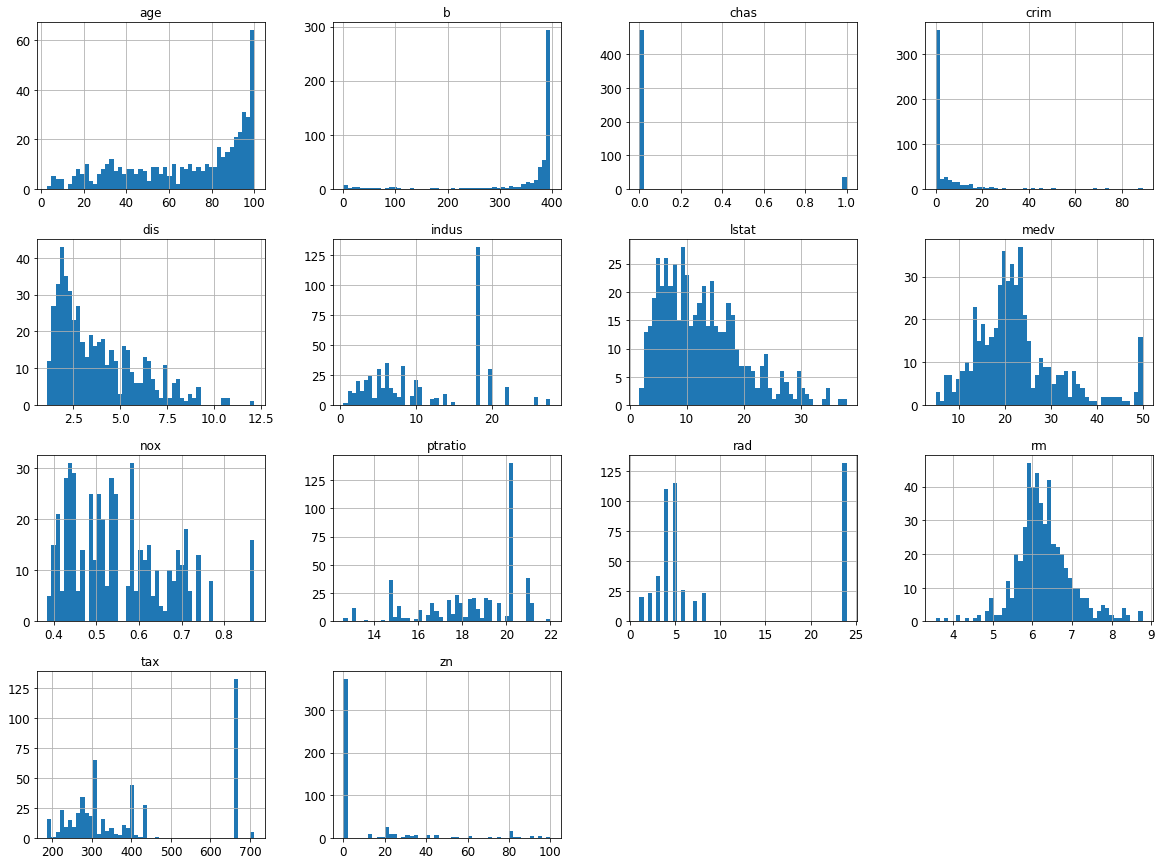

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    """An simple implementation of the spliting into train and test sets"""
    shuffled_indices = np.random.permutation(len(data)) # Give it random indexes
    test_set_size = int(len(data) * test_ratio) # split into ratio
    test_indices = shuffled_indices[:test_set_size] # extract index of test examples
    train_indices = shuffled_indices[test_set_size:] # extract index of train examples
    return data.iloc[train_indices], data.iloc[test_indices] # return the splited data

In [0]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
print(train_set.shape)

(405, 14)


In [0]:
len(test_set)

101

In [0]:
test_set.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27,16.1


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [0]:
test_set.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27,16.1


They are the same... interesting

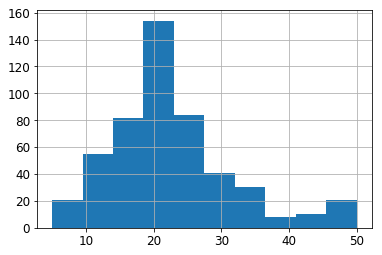

In [0]:
housing["medv"].hist()

In [0]:
# Since this histogram is "tail heavy" (extends much farther to the right from the median and to the left)
# We will try to transform this atrribute to have a more bell-shaped distribution
housing["medv_cat"] = pd.cut(housing["medv"],
                               bins=[0., 7.5, 15., 22.5, 30., np.inf],
                               labels=[1, 8, 15, 22, 29])

In [0]:
housing["medv_cat"].value_counts()

15    200
22    125
8      86
29     84
1      11
Name: medv_cat, dtype: int64

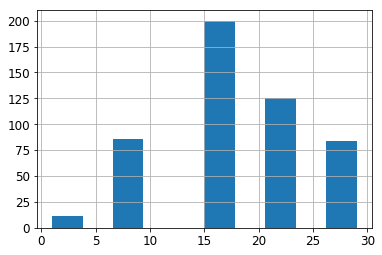

In [0]:
housing["medv_cat"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["medv_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [0]:
strat_test_set["medv_cat"].value_counts() / len(strat_test_set)

15    0.392157
22    0.245098
8     0.176471
29    0.166667
1     0.019608
Name: medv_cat, dtype: float64

In [0]:
housing["medv_cat"].value_counts() / len(housing)

15    0.395257
22    0.247036
8     0.169960
29    0.166008
1     0.021739
Name: medv_cat, dtype: float64

In [0]:
def medv_cat_proportions(data):
    return data["medv_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": medv_cat_proportions(housing),
    "Stratified": medv_cat_proportions(strat_test_set),
    "Random": medv_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [0]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.021739,0.019608,0.029412,35.294118,-9.803922
8,0.169960,0.176471,0.166667,-1.937984,3.830369
15,0.395257,0.392157,0.441176,11.617647,-0.784314
22,0.247036,0.245098,0.254902,3.184314,-0.784314
29,0.166008,0.166667,0.107843,-35.037348,0.396825


In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("medv_cat", axis=1, inplace=True)

STEP 3. DISCOVER AND VISUALIZE DATA TO GAIN INSIGHTS

In [0]:
# Make a copy of the stratified train set
housing = strat_train_set.copy()

In [0]:
#housing.plot(kind="scatter", x="longitude", y="latitude")
# save_fig("bad_visualization_plot")

# Add alpha channel for transparent so that the plot is less crowded.
#housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# save_fig("better_visualization_plot")

# Incorporate the population into the circle size
# Add color (jet map) for the value of the housing
#housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#    s=housing["population"]/100, label="population", figsize=(10,7),
#    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
#    sharex=False)
#plt.legend()
# save_fig("housing_prices_scatterplot")



 Above is the making of the map, which is not possible with this data because the longitude and latitude values are not given.

In [0]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

In [0]:
# Let's look at how much each feature correlates to the house value 
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.701072
zn         0.382548
b          0.329312
dis        0.268066
chas       0.176532
rad       -0.371562
crim      -0.378276
age       -0.396913
nox       -0.440471
tax       -0.460798
ptratio   -0.493600
indus     -0.496390
lstat     -0.736081
Name: medv, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbe77d1550>,
      dtype=object)

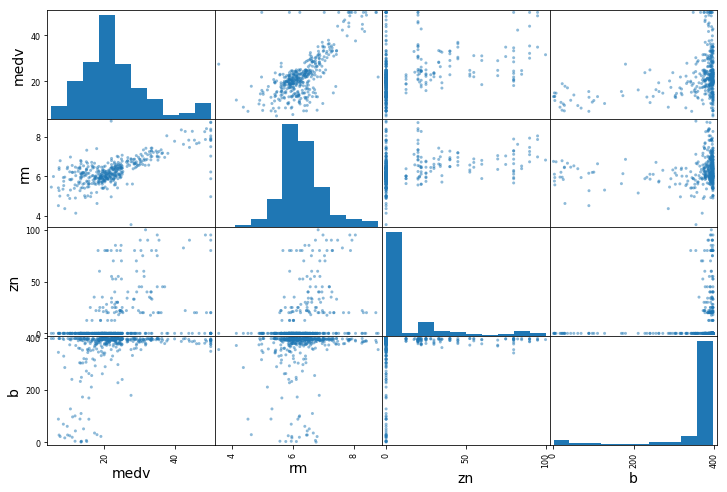

In [0]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["medv", "rm", "zn",
              "b"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

[0, 9, 0, 55]

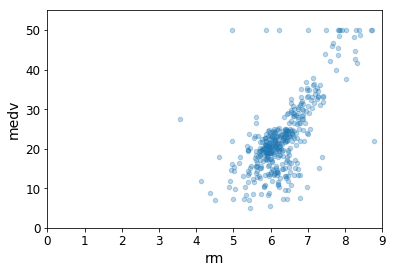

In [0]:
housing.plot(kind="scatter", x="rm", y="medv",
             alpha=0.3)
plt.axis([0, 9, 0, 55])
# save_fig("rooms_vs_house_value_scatterplot")

In [0]:
#housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
#housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
#housing["population_per_household"]=housing["population"]/housing["households"]
#housing.shape

Information on total bedrooms and population not given, average rooms already given.

In [0]:
#corr_matrix = housing.corr()
#corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

Nothing changed so no need to redo.

In [0]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.614852,11.888614,11.190520,0.056931,0.555616,6.293215,68.322030,3.844561,9.435644,405.809406,18.406188,357.392673,12.605322,22.557673
std,8.708215,23.765500,6.964772,0.231997,0.118829,0.709809,28.687598,2.173878,8.652848,167.580611,2.204740,89.464577,7.096953,9.274454
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.086097,0.000000,5.175000,0.000000,0.448000,5.884750,43.625000,2.102700,4.000000,279.750000,16.900000,375.442500,6.987500,16.800000
50%,0.257780,0.000000,9.690000,0.000000,0.538000,6.198500,79.200000,3.207450,5.000000,330.000000,19.050000,391.260000,11.360000,21.150000
75%,3.489463,20.000000,18.100000,0.000000,0.624000,6.626000,94.100000,5.287300,24.000000,666.000000,20.200000,396.210000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


STEP 4

In [0]:
# Create the features and labels for training
#housing = strat_train_set.drop("medv", axis=1) # drop labels for training set
#housing_labels = strat_train_set["medv"].copy()

**Don't know if this is needed, because there are no labels in the original csv.**

In [0]:
# Check to see if there's any missing value in the data with .isnull()
#sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
#sample_incomplete_rows

In [0]:
# Scikit-Learn has a handy class to take care of this: the SimpleImputer class.
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])

In [0]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
imputer.statistics_

array([2.57780e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.19850e+00, 7.92000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91260e+02, 1.13600e+01, 2.11500e+01])

In [0]:
housing_num.median().values

array([2.57780e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.19850e+00, 7.92000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91260e+02, 1.13600e+01, 2.11500e+01])

In [0]:
X = imputer.transform(housing_num)
print(X)

[[1.09600e-02 5.50000e+01 2.25000e+00 ... 3.94720e+02 8.23000e+00
  2.20000e+01]
 [4.92980e-01 0.00000e+00 9.90000e+00 ... 3.96900e+02 4.54000e+00
  2.28000e+01]
 [1.28023e+01 0.00000e+00 1.81000e+01 ... 2.40520e+02 2.37900e+01
  1.08000e+01]
 ...
 [1.39140e-01 0.00000e+00 4.05000e+00 ... 3.96900e+02 1.46900e+01
  2.31000e+01]
 [2.61690e-01 0.00000e+00 9.90000e+00 ... 3.96300e+02 1.17200e+01
  1.94000e+01]
 [6.71772e+00 0.00000e+00 1.81000e+01 ... 3.20000e-01 1.74400e+01
  1.34000e+01]]


Not all imputer stuff not needed

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

rm_ix, b_ix, zn_ix, medv_ix = 5, 11, 1, 13

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rm_per_medv = X[:, rm_ix] / X[:, medv_ix]
        b_per_medv = X[:, b_ix] / X[:, medv_ix]
        zn_per_medv = X[:, zn_ix] / X[:, medv_ix]
        return np.c_[X, rm_per_medv, b_per_medv, zn_per_medv]

# When set to false, that feature will not be added --> so here it adds two features only
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [0]:
housing_num_tr

array([[-0.41436279,  1.81628165, -1.28526893, ..., -0.2077238 ,
         0.0125589 ,  2.38891549],
       [-0.35894182, -0.50086701, -0.18552221, ..., -0.22524378,
        -0.04734017, -0.50237538],
       [ 1.05634047, -0.50086701,  0.99329126, ...,  1.6791432 ,
         0.49816455, -0.50237538],
       ...,
       [-0.3996251 , -0.50086701, -1.026505  , ..., -0.60301834,
        -0.07270294, -0.50237538],
       [-0.38553473, -0.50086701, -0.18552221, ..., -0.07765033,
         0.29145674, -0.50237538],
       [ 0.35675688, -0.50086701,  0.99329126, ...,  1.38797685,
        -1.99759404, -0.50237538]])

In [0]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [0]:
print(housing.shape)
print(housing_prepared.shape)

(404, 14)
(404, 17)


In [0]:
housing_prepared

array([[-0.41436279,  1.81628165, -1.28526893, ..., -0.2077238 ,
         0.0125589 ,  2.38891549],
       [-0.35894182, -0.50086701, -0.18552221, ..., -0.22524378,
        -0.04734017, -0.50237538],
       [ 1.05634047, -0.50086701,  0.99329126, ...,  1.6791432 ,
         0.49816455, -0.50237538],
       ...,
       [-0.3996251 , -0.50086701, -1.026505  , ..., -0.60301834,
        -0.07270294, -0.50237538],
       [-0.38553473, -0.50086701, -0.18552221, ..., -0.07765033,
         0.29145674, -0.50237538],
       [ 0.35675688, -0.50086701,  0.99329126, ...,  1.38797685,
        -1.99759404, -0.50237538]])

In [0]:
housing_labels = strat_train_set["medv"].copy()

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [22.  22.8 10.8  9.5 21.4]


In [0]:
print("Labels:", list(some_labels))

Labels: [22.0, 22.8, 10.8, 9.5, 21.4]


In [0]:
some_data_prepared

array([[-4.14362785e-01,  1.81628165e+00, -1.28526893e+00,
        -2.45697892e-01, -1.40389018e+00,  2.25388348e-01,
        -1.27118311e+00,  1.59486085e+00, -9.76106727e-01,
        -6.32176961e-01, -1.41061493e+00,  4.17747571e-01,
        -6.17271491e-01, -6.02045936e-02, -2.07723797e-01,
         1.25588952e-02,  2.38891549e+00],
       [-3.58941822e-01, -5.00867013e-01, -1.85522211e-01,
        -2.45697892e-01, -9.78721024e-02,  4.82113124e-01,
         4.94832289e-01, -2.42752427e-01, -6.28970180e-01,
        -6.08278256e-01, -2.81021382e-03,  4.42144970e-01,
        -1.13785761e+00,  2.61608065e-02, -2.25243777e-01,
        -4.73401737e-02, -5.02375376e-01],
       [ 1.05634047e+00, -5.00867013e-01,  9.93291265e-01,
        -2.45697892e-01,  1.55360883e+00, -6.19546491e-01,
         9.86943298e-01, -8.97647990e-01,  1.68527347e+00,
         1.55455460e+00,  8.14624782e-01, -1.30797675e+00,
         1.57793720e+00, -1.26932019e+00,  1.67914320e+00,
         4.98164553e-01, -5.0

In [0]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.390032425468688e-14

In [0]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

5.14110206551669e-14

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [0]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.341149615926354e-16

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.64316292 0.32684747 0.15617376 0.18740851 0.15165751 0.22304708
 0.80731035 0.47434165 0.89218832 0.1183216 ]
Mean: 0.39804591656422594
Standard deviation: 0.27478982569692245


In [0]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.49395459e-14 4.26336924e-14 3.20741575e-14 2.85095791e-14
 3.89848614e-14 6.90023751e-14 2.14918073e-14 7.21238339e-14
 7.62531046e-14 2.16431422e-14]
Mean: 4.3765609951539764e-14
Standard deviation: 1.9883458166169762e-14


In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0985501078760246

In [0]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.27647154 0.20761098 0.10632245 0.29636361 0.12523747 0.14562117
 0.14851902 0.28008847 0.54170093 0.06717998]
Mean: 0.21951156254296844
Standard deviation: 0.13121427972072158


In [0]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     4.376561e-14
std      2.095901e-14
min      2.149181e-14
25%      2.940072e-14
50%      3.696220e-14
75%      6.241020e-14
max      7.625310e-14
dtype: float64

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of ? rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [0]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.426458483073017 {'max_features': 2, 'n_estimators': 3}
2.0678515447200505 {'max_features': 2, 'n_estimators': 10}
1.7663866128499432 {'max_features': 2, 'n_estimators': 30}
1.9676041005724856 {'max_features': 4, 'n_estimators': 3}
1.504406234636071 {'max_features': 4, 'n_estimators': 10}
1.1297712659256876 {'max_features': 4, 'n_estimators': 30}
2.0003107569356398 {'max_features': 6, 'n_estimators': 3}
1.2208112868170093 {'max_features': 6, 'n_estimators': 10}
0.8939191499485083 {'max_features': 6, 'n_estimators': 30}
1.3597860684001661 {'max_features': 8, 'n_estimators': 3}
0.9000375404711884 {'max_features': 8, 'n_estimators': 10}
0.6362238191664998 {'max_features': 8, 'n_estimators': 30}
2.5924469286964795 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.7799351973964368 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.7290518968631925 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.3945622827238802 {'bootstrap': False, 'max_features': 3, 'n_e

In [0]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003984,0.001030,0.000903,0.000046,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.555336,-2.404321,-7.026461,-6.737764,-8.749958,-5.887701,2.194509,17,-1.681300e+00,-2.274857e+00,-2.501235e+00,-3.155026e+00,-1.476958e+00,-2.217875e+00,5.997769e-01
1,0.009852,0.000526,0.001328,0.000077,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.357168,-1.535938,-8.356935,-4.283726,-4.853412,-4.276010,2.376677,16,-1.135661e+00,-1.087051e+00,-1.334183e+00,-1.022453e+00,-1.257599e+00,-1.167389e+00,1.135127e-01
2,0.026742,0.000636,0.002492,0.000204,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.921092,-1.159688,-4.829411,-3.082302,-3.614215,-3.120122,1.188661,12,-5.168238e-01,-6.382399e-01,-5.313892e-01,-3.988261e-01,-7.756157e-01,-5.721789e-01,1.269092e-01
3,0.003853,0.000023,0.000837,0.000010,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-5.372675,-3.547682,-2.215734,-2.411481,-5.833986,-3.871466,1.487462,14,-1.125717e+00,-1.517798e+00,-1.323013e+00,-2.142900e+00,-7.926955e-01,-1.380425e+00,4.502971e-01
4,0.011097,0.000189,0.001223,0.000010,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.584777,-1.042895,-3.404699,-1.841042,-3.457522,-2.263238,0.985029,9,-3.876053e-01,-5.716192e-01,-1.036223e+00,-7.360833e-01,-6.223015e-01,-6.707664e-01,2.145619e-01
5,0.031450,0.000160,0.002388,0.000039,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.913867,-0.698383,-1.508832,-0.937790,-2.336126,-1.276383,0.591217,4,-2.180571e-01,-2.768144e-01,-2.955760e-01,-2.904027e-01,-3.872917e-01,-2.936284e-01,5.437048e-02
6,0.004385,0.000112,0.000870,0.000025,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.857668,-2.594636,-9.250316,-2.209547,-4.095208,-4.001243,2.736331,15,-3.682525e-01,-4.776333e-01,-1.828166e+00,-1.270839e+00,-9.691701e-01,-9.828123e-01,5.349129e-01
7,0.012452,0.000096,0.001240,0.000014,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.032868,-1.761454,-2.778316,-0.896670,-0.976245,-1.490380,0.715746,6,-3.552474e-01,-3.833690e-01,-4.900238e-01,-2.899015e-01,-2.388090e-01,-3.514701e-01,8.568800e-02
8,0.035835,0.000287,0.002355,0.000048,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.414292,-0.737065,-1.099340,-0.564451,-1.185074,-0.799091,0.298451,2,-1.114857e-01,-1.458436e-01,-1.236171e-01,-1.095344e-01,-2.039902e-01,-1.388942e-01,3.502111e-02
9,0.004802,0.000043,0.000847,0.000016,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.950878,-2.099259,-1.832689,-1.853512,-1.504500,-1.849018,0.195439,7,-5.631785e-01,-3.009838e-01,-8.847506e-01,-1.146956e+00,-4.566907e-01,-6.705119e-01,3.055120e-01


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6136956037279071 {'max_features': 7, 'n_estimators': 180}
1.2491680840023929 {'max_features': 5, 'n_estimators': 15}
1.1955630926688168 {'max_features': 3, 'n_estimators': 72}
1.145978788137344 {'max_features': 5, 'n_estimators': 21}
0.6473276606165508 {'max_features': 7, 'n_estimators': 122}
1.1896912283957926 {'max_features': 3, 'n_estimators': 75}
1.2038697995090117 {'max_features': 3, 'n_estimators': 88}
0.8904972314987445 {'max_features': 5, 'n_estimators': 100}
1.2063902205076145 {'max_features': 3, 'n_estimators': 150}
2.466099357204401 {'max_features': 5, 'n_estimators': 2}


In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.00127468e-02, 6.21419825e-05, 9.23121075e-03, 2.81040708e-05,
       1.26865916e-03, 9.87935197e-02, 2.76052913e-03, 1.08295799e-02,
       1.49644052e-04, 4.94651066e-04, 1.18135601e-03, 1.77039352e-03,
       1.34830788e-01, 4.44487183e-01, 2.22940904e-01, 6.10589593e-02,
       9.96300490e-05])

In [0]:
extra_attribs = ["rm_per_medval", "b_per_medval", "zn_per_medval"]
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4444871831762242, 'medv'),
 (0.22294090350971582, 'rm_per_medval'),
 (0.1348307878918999, 'lstat'),
 (0.09879351971534517, 'rm'),
 (0.06105895925683189, 'b_per_medval'),
 (0.010829579891080585, 'dis'),
 (0.010012746757873845, 'crim'),
 (0.00923121075495095, 'indus'),
 (0.002760529133636641, 'age'),
 (0.0017703935199382208, 'b'),
 (0.0012686591642503517, 'nox'),
 (0.0011813560076766214, 'ptratio'),
 (0.00049465106627215, 'tax'),
 (0.00014964405206410825, 'rad'),
 (9.963004899616988e-05, 'zn_per_medval'),
 (6.214198248199997e-05, 'zn'),
 (2.810407076147395e-05, 'chas')]

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.copy()
y_test = strat_test_set["medv"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [0]:
final_rmse

0.8853133561412537

In [0]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


array([       nan, 1.38804136])

Not sure what happened...


After trying out the different regressions, the best one that produced the lowest number was the RandomForestRegressor, as shown above.
